## Individual cases analysis - which population group were the most endangered and are they now vaccinated?

In [21]:
#importing required packages 
import requests
import json
import pandas as pd
import numpy as np
from collections import defaultdict
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
import Module as m

In [66]:
df = m.get_individual()

In [67]:
df.columns= ['age', 'sex', 'ditrict', 'sub-district', 'imported', 'import_country'] 
df['sex'] = df["sex"].apply(lambda x: "F" if x=="Z" else "M") #transforming the data to english. Make sure to use only once!

In [99]:
df["sex"].value_counts()

F    850576
M    806540
Name: sex, dtype: int64

We can see that significantly more women were infected, which might have been expected as there are slightly more women in Czech Rebuplic, however the magnitute of the differnce is surprisingly significant

In [102]:
df['age'].describe().round(2)

count    1657048.00
mean          42.87
std           20.73
min            0.00
25%           28.00
50%           44.00
75%           57.00
max          120.00
Name: age, dtype: float64

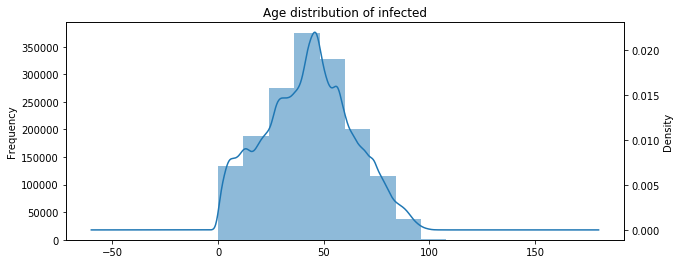

In [98]:
fig1, ax1 = plt.subplots(figsize=(10,4))

df['age'].plot(kind="hist", ax=ax1, alpha=0.5, bins=10)
 
ax_1 = ax1.twinx()

df['age'].plot(kind="kde", ax=ax_1)

plt.title('Age distribution of infected') 
plt.show()

In [26]:
df['import_country'].value_counts().head(10)

UA    2903
DE    2611
AT    1014
SK    1001
HR     736
ES     553
EG     469
IT     459
PL     453
RU     398
Name: import_country, dtype: int64

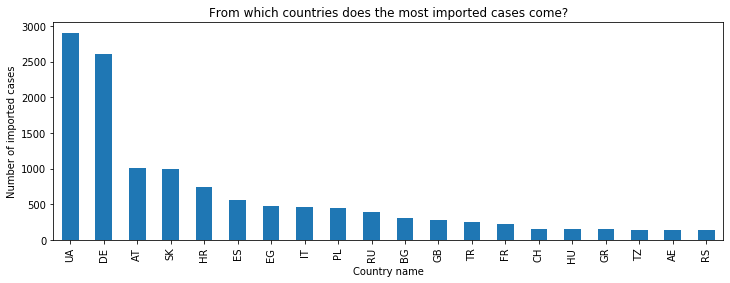

In [44]:
dfo = df['import_country'].value_counts()
dfo1 = dfo.sort_values(ascending = False)[0:20]
dfo2 = dfo1.plot.bar(figsize=(12,4))

plt.xlabel('Country name')
plt.ylabel('Number of imported cases')
plt.title('From which countries does the most imported cases come?')
plt.show()

In [53]:
df_deaths = m.get_individual_deaths()

In [54]:
df_deaths.columns= ['age', 'sex', 'ditrict', 'sub-district']

In [55]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30387 entries, 2020-03-22 to 2021-08-20
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           30387 non-null  int64 
 1   sex           30387 non-null  object
 2   ditrict       30387 non-null  object
 3   sub-district  30387 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [56]:
df_deaths['sex'] = df_deaths["sex"].apply(lambda x: "F" if x=="Z" else "M")
df_deaths['sex'].value_counts()

M    17474
F    12913
Name: sex, dtype: int64

We can observe that eventhough significantly more women got infected, the number of deaths is significantly higher for men. Thus let's find out wheather there might have been other factors causing the difference in deathrates. For example whether the men were significantly older then women. 

In [76]:
df_w = df.query("sex == 'F'")
df_m = df.query("sex == 'M'")

In [92]:
df_d_w = df_deaths.query("sex == 'F'")
df_d_m = df_deaths.query("sex == 'M'")

In [90]:
df_w['age'].describe() #describtive statistics of infected women

count    850549.000000
mean         43.762440
std          21.044275
min           0.000000
25%          29.000000
50%          44.000000
75%          58.000000
max         120.000000
Name: age, dtype: float64

In [89]:
df_m['age'].describe() #describtive statistics of infected men

count    806499.000000
mean         41.935262
std          20.347262
min           0.000000
25%          27.000000
50%          43.000000
75%          56.000000
max         120.000000
Name: age, dtype: float64

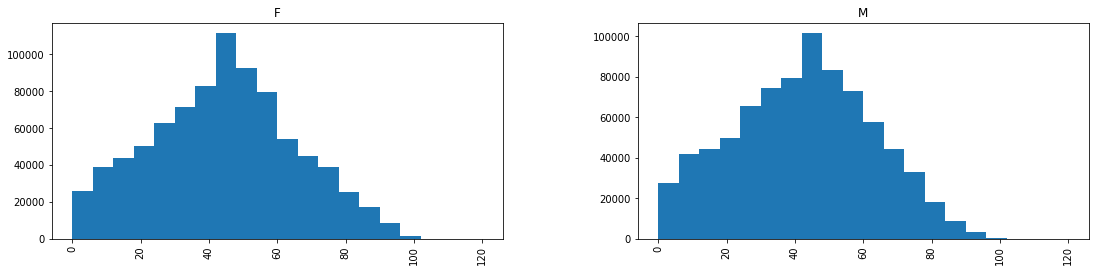

In [96]:
df.hist("age", bins=20, by = ["sex"], layout=[1,2],figsize = [18,4]);

In [93]:
df_d_w['age'].describe() #decribtive statistics of women's deaths

count    12913.000000
mean        79.297452
std         10.528111
min          0.000000
25%         73.000000
50%         80.000000
75%         87.000000
max        104.000000
Name: age, dtype: float64

In [94]:
df_d_m['age'].describe() #decribtive statistics of men's deaths

count    17474.000000
mean        75.641296
std         10.271214
min         11.000000
25%         70.000000
50%         76.000000
75%         83.000000
max        103.000000
Name: age, dtype: float64

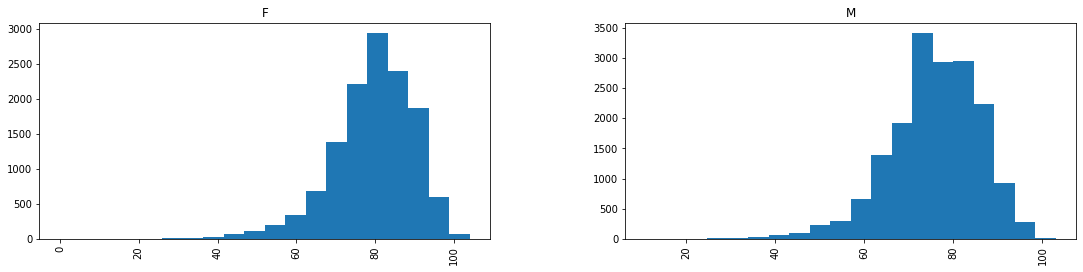

In [97]:
df_deaths.hist("age", bins=20, by = ["sex"], layout=[1,2],figsize = [18,4]); 

We can observe that both by mean and 75% percentile women were approx. 2 year older then men (also median is higher). Moreover women on average died at approx. 3.5 years older age. Therefore this does not explain the higher deathrate of men. It might have been given by other underlining conditions (other heath problems), however our sample is pretty big, and this is deffinitelly an interesting pattern. 